# Spam Detection

The main aim of this project is to demonstrate the basics of Natural Language Processing(NLP).

We will follow the steps mentioned below:

1.Data Loading

2.Exploratory Data Analysis

3.Data Processing
- Remove special characters
- Convertion to lowercase
- Tokenization
- Stemming or Lemmatization

4.Data Preparation
- Train Test Split
- Identify the target variable
- Use bag of words to convert Text data to numerical vector

5.Train the model
- Logistic Regression
- Decision Tree
- SVM

6.Evaluation
- Check accuracy score
- Build confusion metrix
- print classification report

# 1. Loading the Data

In [52]:
import warnings
warnings.filterwarnings('ignore')


In [84]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns




In [85]:
df=pd.read_csv("SMSSpamCollection", sep="\t", names=['target','message'])
df.head()

,target,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [55]:
df.columns


Index(['target', 'message'], dtype='object')

# 2. Exploratory Data Analysis

In [56]:
df.head()


,target,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [57]:
df.shape


(5572, 2)

In [58]:
df['target'].value_counts()


ham     4825
spam     747
Name: target, dtype: int64

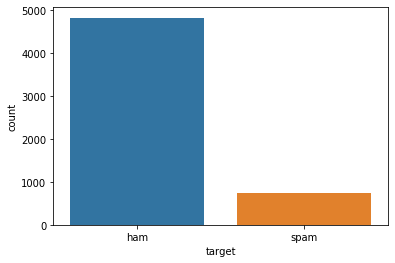

In [59]:
sns.countplot(x='target', data=df)


In [60]:
df['message'].value_counts()


Sorry, I'll call later                                                                                                                                                                                                                                              30
I cant pick the phone right now. Pls send a message                                                                                                                                                                                                                 12
Ok...                                                                                                                                                                                                                                                               10
Say this slowly.? GOD,I LOVE YOU &amp; I NEED YOU,CLEAN MY HEART WITH YOUR BLOOD.Send this to Ten special people &amp; u c miracle tomorrow, do it,pls,pls do it...                                                

## Word Cloud for the ham


In [61]:
!pip install wordcloud

In [62]:
from wordcloud import WordCloud, STOPWORDS


In [63]:
df = df.loc[df['target']=='ham', :]

df.head()



,target,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
6,ham,Even my brother is not like to speak with me. ...


In [64]:
df['target'].value_counts()


ham    4825
Name: target, dtype: int64

In [65]:
words = ' '.join(df['message'])

print(words)


Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat... Ok lar... Joking wif u oni... U dun say so early hor... U c already then say... Nah I don't think he goes to usf, he lives around here though Even my brother is not like to speak with me. They treat me like aids patent. As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your callertune for all Callers. Press *9 to copy your friends Callertune I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today. I've been searching for the right words to thank you for this breather. I promise i wont take your help for granted and will fulfil my promise. You have been wonderful and a blessing at all times. I HAVE A DATE ON SUNDAY WITH WILL!! Oh k...i'm watching here:) Eh u remember how 2 spell his name... Yes i did. He v naughty make until i v wet. Fine if thats the way u feel. Thats the way its gota 

In [66]:
df = df.loc[df['target']=='ham', :]

words = ' '.join(df['message'])

cleaned_word = " ".join([word for word in words.split()
                            if 'http' not in word
                                and not word.startswith('@')
                                and word != 'RT'
                            ])


In [67]:
wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color='black',
                      width=1600,
                      height=800
                     ).generate(cleaned_word)


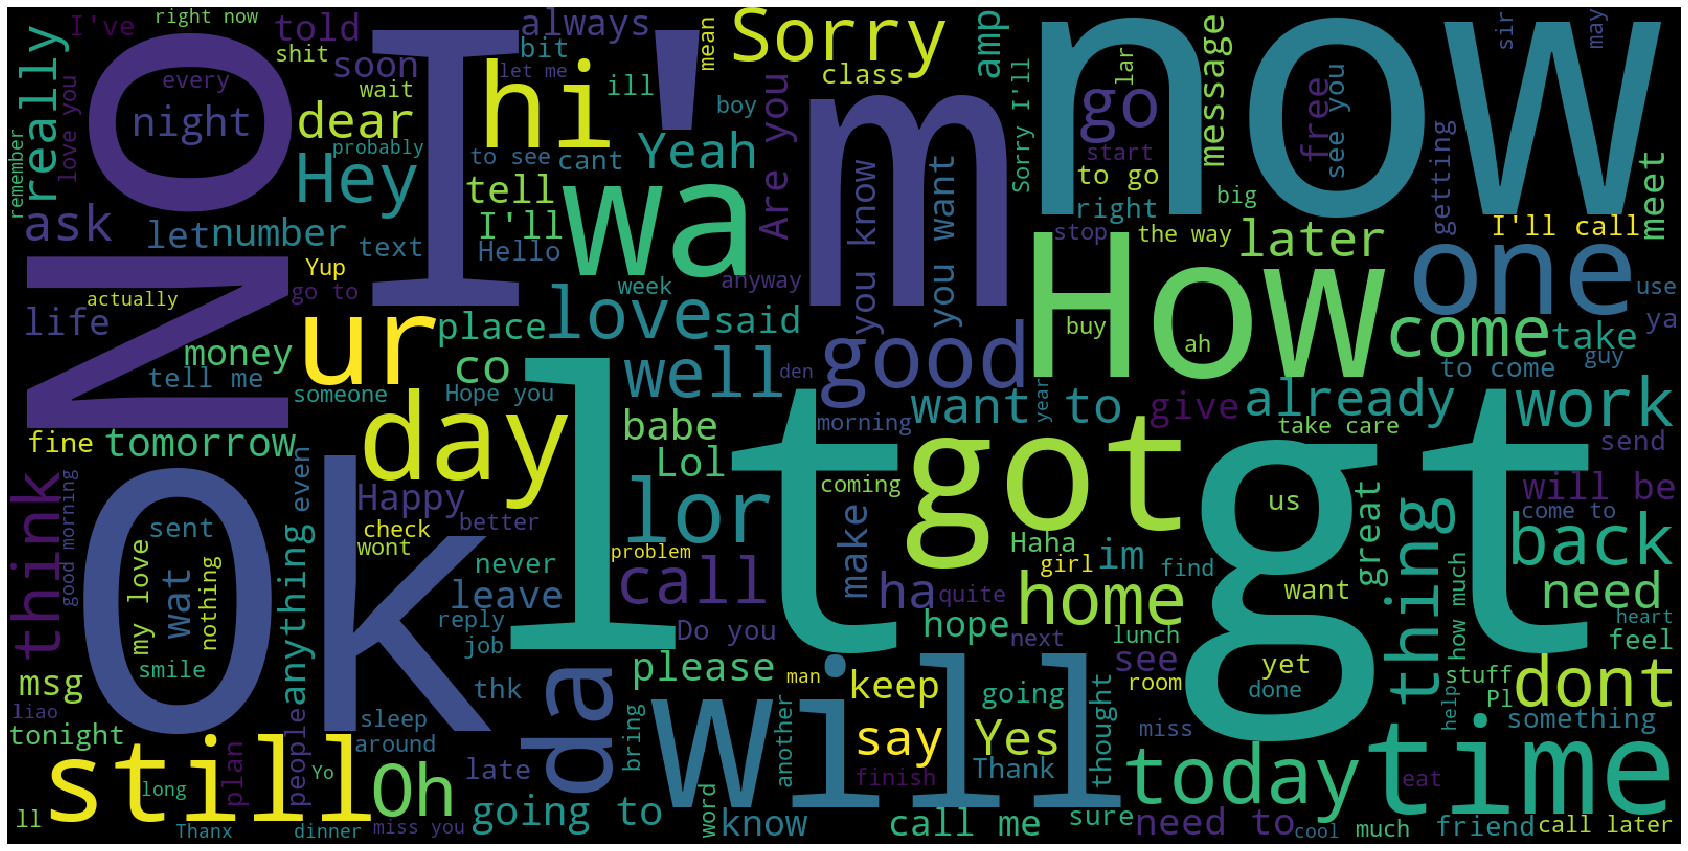

In [68]:
plt.figure(1,figsize=(30,20))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

We can find that the SMSSpamCollection with ham frequently involved some words like how,come, night,call .people might guess that ham is ill at night so he does not attend the call and he cannot come to home so he tells that he will attend the call latter.


# 3.Data Processing


Our data exploration ends up at here. The next step will be preprocess the data in order to make the learning process more smooth.

Preprocessing steps:

- Remove special characters
- Convertion to lowercase
- Tokenization
- Stemming or Lemmatization



In [69]:
# import nltk
# nltk.download('stopwords')


In [70]:
import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer


In [71]:
## initialise the inbuilt Stemmer
stemmer = PorterStemmer()


In [72]:
# # We can also use Lemmatizer instead of Stemmer

lemmatizer = WordNetLemmatizer()


In [73]:
# initializing the lists

clean_SMSSpamCollection_lst = []

SMSSpamCollection_len_lst = []


In [75]:
def preprocess(raw_SMSSpamCollection, flag):
    # Removing special characters and digits
    letters_only = re.sub("[^a-zA-Z]", " ",raw_SMSSpamCollection)
    
    # change sentence to lower case
    letters_only = letters_only.lower()

    # tokenize into words
    words = letters_only.split()
    
    # remove stop words                
    words = [w for w in words if not w in stopwords.words("english")]
    
    #Stemming/Lemmatization
    if(flag == 'stem'):
        words = [stemmer.stem(word) for word in words]
    else:
        words = [lemmatizer.lemmatize(word) for word in words]
    
    clean_SMSSpamCollection_lst.append(" ".join(words))
    
    SMSSpamCollection_len_lst.append(len(words))


Stemming makes sure that different variations of a word, say ‘warm’, warmer’, ‘warming’ and ‘warmed,’ are represented by a single token - ‘warm’, because they all represent the same information (represented by the 'stem' of the word).



In [76]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Asus\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [77]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Asus\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [87]:
from tqdm import tqdm, tqdm_notebook

tqdm.pandas()


In [88]:


clean_SMSSpamCollection_lst = []

SMSSpamCollection_len_lst = []

df['message'].progress_apply(lambda x: preprocess(x, 'stem'))

df['clean_SMSSpamCollection_stem'] = clean_SMSSpamCollection_lst

df['SMSSpamCollection_length_stem'] = SMSSpamCollection_len_lst

100%|██████████████████████████████████████████████████████████████████████████████| 5572/5572 [01:00<00:00, 92.13it/s]


In [89]:


clean_SMSSpamCollection_lst = []

SMSSpamCollection_len_lst = []

df['message'].progress_apply(lambda x: preprocess(x, 'lemma'))

df['clean_SMSSpamCollection_lema'] = clean_SMSSpamCollection_lst

df['SMSSpamCollection_length_lema'] = SMSSpamCollection_len_lst


100%|██████████████████████████████████████████████████████████████████████████████| 5572/5572 [00:58<00:00, 95.87it/s]


In [90]:
df.head()


,target,message,clean_SMSSpamCollection_stem,SMSSpamCollection_length_stem,clean_SMSSpamCollection_lema,SMSSpamCollection_length_lema
0,ham,"Go until jurong point, crazy.. Available only ...",go jurong point crazi avail bugi n great world...,16,go jurong point crazy available bugis n great ...,16
1,ham,Ok lar... Joking wif u oni...,ok lar joke wif u oni,6,ok lar joking wif u oni,6
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entri wkli comp win fa cup final tkt st m...,21,free entry wkly comp win fa cup final tkts st ...,21
3,ham,U dun say so early hor... U c already then say...,u dun say earli hor u c alreadi say,9,u dun say early hor u c already say,9
4,ham,"Nah I don't think he goes to usf, he lives aro...",nah think goe usf live around though,7,nah think go usf life around though,7


# 4. Data Preparation


In [106]:
# Preparing the target variable
df['detection'] = df['target'].apply(lambda x: 0 if x=='ham' else 1)

df.head()


,target,message,detection,clean_SMSSpamCollection_stem,SMSSpamCollection_length_stem,clean_SMSSpamCollection_lema,SMSSpamCollection_length_lema
0,ham,"Go until jurong point, crazy.. Available only ...",0,go jurong point crazi avail bugi n great world...,16,go jurong point crazy available bugis n great ...,16
1,ham,Ok lar... Joking wif u oni...,0,ok lar joke wif u oni,6,ok lar joking wif u oni,6
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1,free entri wkli comp win fa cup final tkt st m...,21,free entry wkly comp win fa cup final tkts st ...,21
3,ham,U dun say so early hor... U c already then say...,0,u dun say earli hor u c alreadi say,9,u dun say early hor u c already say,9
4,ham,"Nah I don't think he goes to usf, he lives aro...",0,nah think goe usf live around though,7,nah think go usf life around though,7


In [107]:
# splitting into test and train

from sklearn.model_selection  import train_test_split

train, test = train_test_split(df,test_size=0.2,random_state=42)


In [108]:
train_clean_SMSSpamCollection=[]
for SMSSpamCollection in train['clean_SMSSpamCollection_stem']:
    train_clean_SMSSpamCollection.append(SMSSpamCollection)

test_clean_SMSSpamCollection=[]
for SMSSpamCollection in test['clean_SMSSpamCollection_stem']:
    test_clean_SMSSpamCollection.append(SMSSpamCollection)


## Text to numerical vector using Bag of Words



In [109]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(analyzer = "word")

train_features = vectorizer.fit_transform(train_clean_SMSSpamCollection)

test_features = vectorizer.transform(test_clean_SMSSpamCollection)


In [110]:
vectorizer.vocabulary_


{'repli': 3969,
 'win': 5387,
 'weekli': 5323,
 'fifa': 1661,
 'world': 5452,
 'cup': 1082,
 'held': 2114,
 'send': 4196,
 'stop': 4586,
 'end': 1461,
 'servic': 4213,
 'hello': 2118,
 'sort': 4461,
 'town': 4980,
 'alreadi': 147,
 'dont': 1314,
 'rush': 4069,
 'home': 2171,
 'eat': 1403,
 'nacho': 3145,
 'let': 2680,
 'know': 2577,
 'eta': 1512,
 'come': 931,
 'guoyang': 2032,
 'go': 1930,
 'tell': 4784,
 'told': 4934,
 'hey': 2130,
 'sathya': 4122,
 'till': 4897,
 'dint': 1255,
 'meet': 2934,
 'even': 1523,
 'singl': 4330,
 'time': 4898,
 'saw': 4131,
 'situat': 4342,
 'orang': 3389,
 'bring': 619,
 'rington': 4019,
 'chart': 793,
 'hero': 2127,
 'free': 1779,
 'hit': 2144,
 'week': 5321,
 'pic': 3571,
 'wap': 5279,
 'receiv': 3911,
 'tip': 4900,
 'sit': 4337,
 'mu': 3107,
 'wait': 5261,
 'everyon': 1531,
 'get': 1890,
 'suit': 4652,
 'take': 4736,
 'shower': 4290,
 'finish': 1680,
 'liao': 2684,
 'urgent': 5146,
 'mobil': 3034,
 'award': 353,
 'bonu': 563,
 'caller': 702,
 'prize': 

In [111]:
print("Total unique words:", len(vectorizer.vocabulary_))

print("Type of train_features:", type(train_features))

print("Shape of input data", train_features.shape)


Total unique words: 5593
Type of train_features: <class 'scipy.sparse.csr.csr_matrix'>
Shape of input data (4457, 5593)


# 5. Train the Model
       (use algorithms)
       1. logistic regression
       2. decision tree
       3. svm

In [139]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report


In [140]:
Classifiers = [
    LogisticRegression(),
    DecisionTreeClassifier(),
    SVC()]


# 6.Evaluation

In [141]:
from tqdm import tqdm, tqdm_notebook

tqdm.pandas()


In [115]:
dense_features = train_features.toarray()

dense_test = test_features.toarray()

for classifier in tqdm(Classifiers):
    fit = classifier.fit(dense_features,train['detection'])
    pred = fit.predict(dense_test)
    accuracy = accuracy_score(pred,test['detection'])
    print('Accuracy of '+classifier.__class__.__name__+' is '+str(accuracy))


 33%|████████████████████████████                                                        | 1/3 [00:01<00:03,  1.55s/it]

Accuracy of LogisticRegression is 0.9838565022421525


 67%|████████████████████████████████████████████████████████                            | 2/3 [00:25<00:08,  8.38s/it]

Accuracy of DecisionTreeClassifier is 0.97847533632287


100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [02:37<00:00, 52.51s/it]

Accuracy of SVC is 0.9838565022421525


In [129]:
dense_features = train_features.toarray()

dense_test = test_features.toarray()

for classifier in tqdm(Classifiers):
    fit = classifier.fit(dense_features,train['detection'])
    pred = fit.predict(dense_test)
    matrix = confusion_matrix(pred,test['detection'])
    print('Matrix of '+classifier.__class__.__name__+' is '+str(matrix))




  0%|                                                                                            | 0/3 [00:00<?, ?it/s]

 33%|████████████████████████████                                                        | 1/3 [00:01<00:03,  1.52s/it]

Matrix of LogisticRegression is [[965  17]
 [  1 132]]




 67%|████████████████████████████████████████████████████████                            | 2/3 [00:25<00:08,  8.33s/it]

Matrix of DecisionTreeClassifier is [[958  18]
 [  8 131]]




100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [02:39<00:00, 53.03s/it]

Matrix of SVC is [[966  18]
 [  0 131]]


In [144]:
dense_features = train_features.toarray()

dense_test = test_features.toarray()

for classifier in tqdm(Classifiers):
    fit = classifier.fit(dense_features,train['detection'])
    pred = fit.predict(dense_test)
    report = classification_report(pred,test['detection'])
    print('Report of'+classifier.__class__.__name__+' is '+str(report))






  0%|                                                                                            | 0/3 [00:00<?, ?it/s]



 33%|████████████████████████████                                                        | 1/3 [00:01<00:03,  1.51s/it]

Report ofLogisticRegression is               precision    recall  f1-score   support

           0       1.00      0.98      0.99       982
           1       0.89      0.99      0.94       133

    accuracy                           0.98      1115
   macro avg       0.94      0.99      0.96      1115
weighted avg       0.99      0.98      0.98      1115







 67%|████████████████████████████████████████████████████████                            | 2/3 [00:25<00:08,  8.34s/it]

Report ofDecisionTreeClassifier is               precision    recall  f1-score   support

           0       0.99      0.98      0.99       974
           1       0.89      0.94      0.91       141

    accuracy                           0.98      1115
   macro avg       0.94      0.96      0.95      1115
weighted avg       0.98      0.98      0.98      1115







100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [02:37<00:00, 52.44s/it]

Report ofSVC is               precision    recall  f1-score   support

           0       1.00      0.98      0.99       984
           1       0.88      1.00      0.94       131

    accuracy                           0.98      1115
   macro avg       0.94      0.99      0.96      1115
weighted avg       0.99      0.98      0.98      1115

